In [20]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys, os

root = os.path.dirname(os.getcwd())
sys.path.insert(0, root)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def get(hist):

    evals = []
    F = []
    G1 = []
    G2 = []

    for algorithm in history:

        F.append(algorithm.pop.get("F").min())
        G1.append(algorithm.pop.get("G")[:, 0].min())
        G2.append(algorithm.pop.get("G")[:, 1].min())

        evals.append(algorithm.evaluator.n_eval)


    F = np.array(F)
    G1 = np.array(G1)
    G2 = np.array(G2)
    
    return F, G1, G2, evals

    

In [66]:
data = {}

for k in range(110):
    
    fname = "ga_%s.npy" % k
    print(fname, end=" ")
    
    try:
        
        history = np.load(os.path.join(root, "results", fname), allow_pickle=True)
        F, G1, G2, evals = get(history)
        
        data[fname] = {
            "algorithm" : history[-1],
            "F" : F,
            "G1" : G1,
            "G2" : G2,
            "evals" : evals, 
        }
        
    except Exception as e:
        print(e)
        continue
    

    

ga_0.npy ga_1.npy ga_2.npy ga_3.npy ga_4.npy ga_5.npy ga_6.npy ga_7.npy ga_8.npy ga_9.npy ga_10.npy ga_11.npy ga_12.npy ga_13.npy ga_14.npy ga_15.npy ga_16.npy ga_17.npy ga_18.npy ga_19.npy ga_20.npy ga_21.npy ga_22.npy ga_23.npy ga_24.npy ga_25.npy ga_26.npy ga_27.npy ga_28.npy ga_29.npy ga_30.npy ga_31.npy ga_32.npy ga_33.npy ga_34.npy ga_35.npy ga_36.npy ga_37.npy ga_38.npy ga_39.npy ga_40.npy ga_41.npy ga_42.npy ga_43.npy ga_44.npy ga_45.npy ga_46.npy ga_47.npy ga_48.npy ga_49.npy ga_50.npy ga_51.npy ga_52.npy ga_53.npy ga_54.npy ga_55.npy ga_56.npy ga_57.npy ga_58.npy ga_59.npy ga_60.npy ga_61.npy ga_62.npy ga_63.npy ga_64.npy ga_65.npy ga_66.npy ga_67.npy ga_68.npy ga_69.npy ga_70.npy ga_71.npy ga_72.npy ga_73.npy ga_74.npy ga_75.npy ga_76.npy ga_77.npy ga_78.npy ga_79.npy ga_80.npy ga_81.npy ga_82.npy ga_83.npy ga_84.npy ga_85.npy ga_86.npy ga_87.npy ga_88.npy ga_89.npy ga_90.npy ga_91.npy ga_92.npy ga_93.npy ga_94.npy ga_95.npy ga_96.npy ga_97.npy ga_98.npy ga_99.npy ga_100.npy

In [83]:
keys = list(data.keys())
res = np.array([data[k]["F"].min() for k in keys])

top = [keys[i] for i in res.argsort()[:10]]


ga_68.npy
Feasible since 32
Feasible with F 54162.80929906769
G1 2681.5633923707182
G2 224.8582499246543
[24413.95390316]
[-9773 -7049 -4480 -3672 -3504 -2031 -1226 -1091  -691  -339]
[31 19 12  9 20 22 27 27 30 30 20 27 33 17 14 19 20 17 17  5 27 27 27 23
 26 37 29 35 34 31 27 22 21 31 29 21 13 20 14 19 12 19 12 19 17 17  9 14
 11 13 19 12 14  8 13  8 27 13 10 14 18 14 18 20 16 18 14 23 14 19 19 14
 22 27 22 18 27 27 24 24 26 14 18 24 27 29 27 20 22 27 27 30 10 29 25 19
 33 32 31 17 29 31 34 30 24 33 27 25 24 21 15  6 19 13 19 16 19 20 19 18
 14 14 14 20 13 20 16 17  7 13 13 10 14 18 14 11 14 12 14 14 19 11 19 22
 13 22  1 13 11 14 14 14 12 11  5  8  6  8  5  7  3  7  3  7  1  6  1  7
  1  7  1 11  1 10  6 16  1 12  2 12  1 17  1  7 17 13  1  5  1  1  1  5
  7  7  8  8 11 11 12 11 20 10 22 11  7  1 27 16 19  1  5 12 13  6  7  1
 13  1  5  2  4  1  8  1  6 10  8  5 15  3  4  4 14  4  1  5 24  8 16 22
  6  7 18 16  7  8  8 10  7  8 12  6 18  8 16  7 13 30 34 17]
ga_37.npy
Feasible since

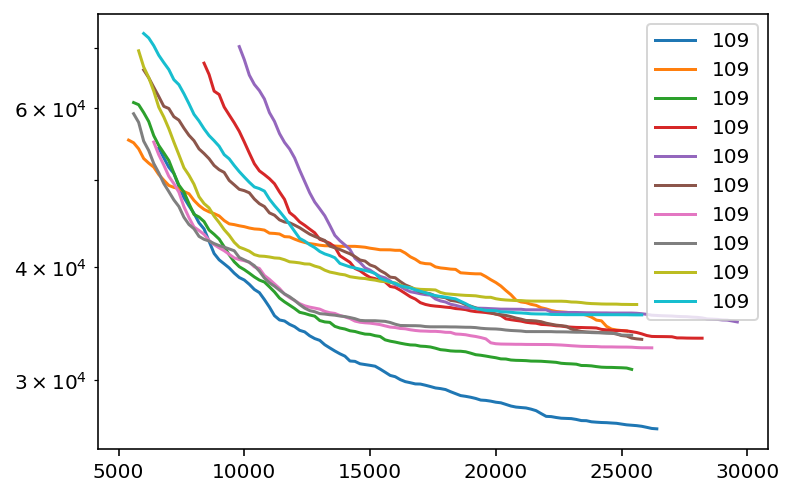

In [85]:




for fname in top:
    
    val = data[fname]
    
    F, G1, G2, evals, algorithm = val["F"], val["G1"], val["G2"], val["evals"], val["algorithm"]
    
    feas = np.where(G1+G2 == 0)[0].min()
    f = algorithm.pop.get("F")
    best = f.argmin()
    x = algorithm.pop.get("X")[best]
    
    
    
    print(fname)
    
    print("Feasible since", feas)
#     print("n_gen", len(F))
    print("Feasible with F", F[feas].max())
#     print("Improvement", F[feas].max() - F.min())
    print("G1", G1.max())
    print("G2", G2.max())
    
    print(f[best])
    print(x[-10:])
    print(x[:-10])
    print("=" * 30)
    
    
    plt.plot(evals[feas:feas+100], F[feas:feas+100], label=str(k))
    
#     plt.plot(evals[feas:], F[feas:], label=fname)
    
plt.yscale("log")
plt.legend()
plt.show()

    

In [73]:
data["ga_68.npy"]

{'algorithm': <pymoo.algorithms.so_genetic_algorithm.GA at 0x81de43b00>,
 'F': array([39488.87967592, 42042.47861066, 40974.032985  , 43123.29415484,
        43372.43210665, 43965.91542438, 44253.13202316, 44507.26049502,
        46477.06479161, 47273.86849131, 47279.54444454, 47809.59213204,
        47800.9836294 , 48018.67220811, 48095.64598686, 48050.31608899,
        48783.24892864, 48509.07829624, 49770.20585367, 50459.91903951,
        51325.98572897, 51261.41523099, 52345.61473754, 53275.8812815 ,
        53277.39454322, 53907.60209574, 54152.99711756, 54177.37883352,
        53942.24086629, 54805.44919239, 54588.77701373, 54873.935079  ,
        54162.80929907, 52844.92551216, 51588.42828653, 50776.72604421,
        49132.17419161, 47745.67411762, 46751.38421224, 45862.00390746,
        44768.77992417, 44083.23133019, 42712.0380823 , 41401.7684407 ,
        40739.94316789, 40326.66896612, 39908.47502406, 39381.12497031,
        38945.27079009, 38695.06103344, 38272.24557885, 37

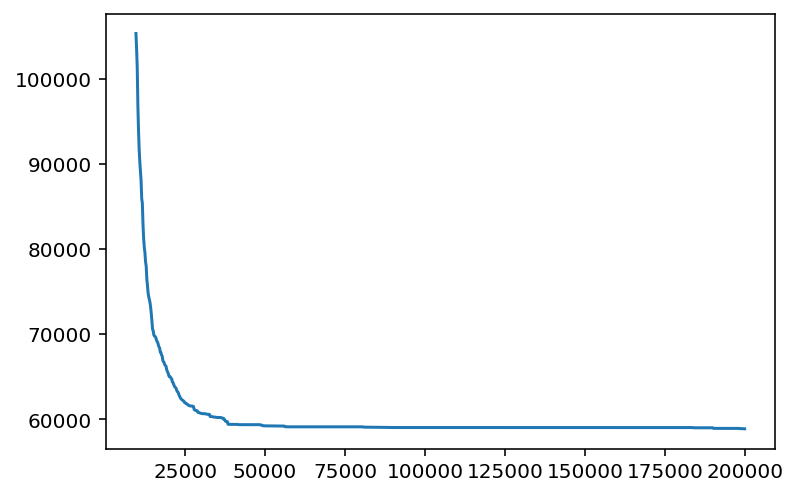

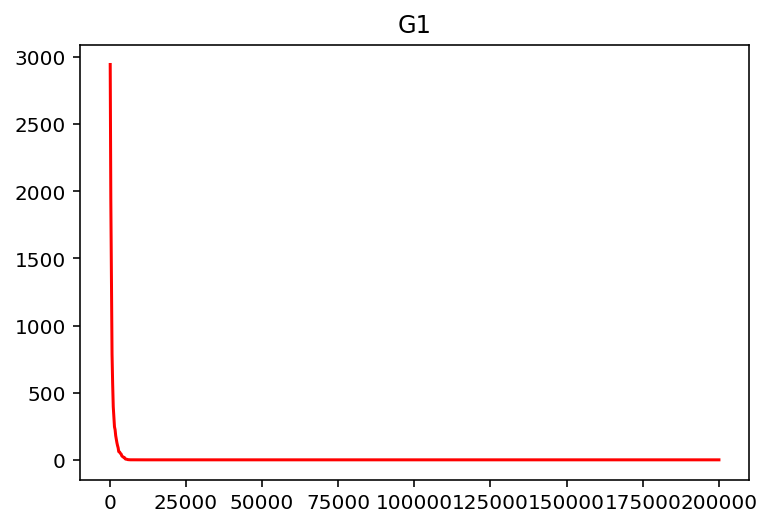

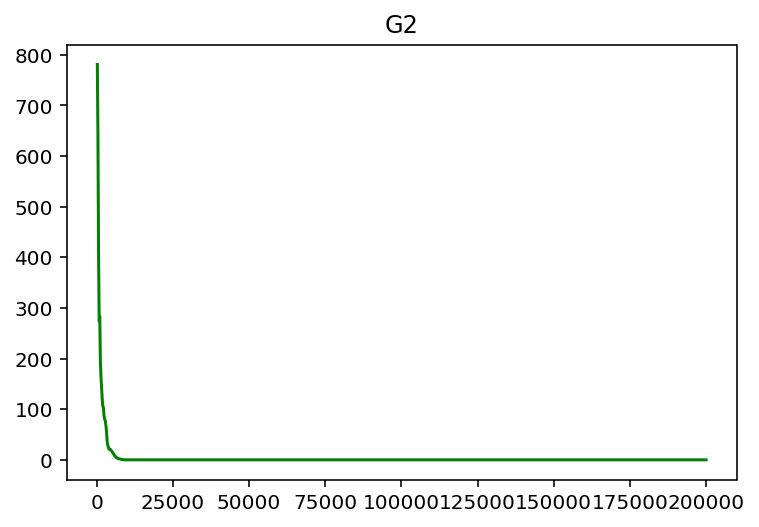

In [19]:
plt.plot(evals[feas:], F[feas:], label="F")
#plt.yscale("log")
plt.show()

plt.title("G1")
plt.plot(evals, G1, color="red")
plt.show()

plt.title("G2")
plt.plot(evals, G2, color="green")
plt.show()


